## 바이앤홀드

In [1]:
import pandas as pd

# AAPL 가져오기
df = pd.read_csv("../../data/csv/AAPL.csv");

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [3]:
# 수정 종가 Adj Close
# 일별 수익률
# 일별 수익률 누적

df.info() # index : 9715 , column : 7 , type = float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9715 entries, 0 to 9714
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9715 non-null   object 
 1   Open       9714 non-null   float64
 2   High       9714 non-null   float64
 3   Low        9714 non-null   float64
 4   Close      9714 non-null   float64
 5   Adj Close  9714 non-null   float64
 6   Volume     9713 non-null   float64
dtypes: float64(6), object(1)
memory usage: 531.4+ KB


### 결측치 확인하기

In [4]:
# 결측치의 개수
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       2
dtype: int64

In [16]:
# 결측치 확인
flag = df.isna().any(axis=1)
df.loc[flag]

,Date,Open,High,Low,Close,Adj Close,Volume
165,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN
174,1981-08-21,0.363839,0.363839,0.359375,0.359375,0.287367,NaN


In [25]:
import numpy as np

flag2 = df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df4 = df.loc[~flag2]
df4

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...,...
9710,2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
9711,2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
9712,2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0
9713,2019-06-21,198.800003,200.850006,198.149994,198.779999,198.779999,47735300.0


In [21]:
# 결측치 제거
df2= df.dropna() # 9713(-2)
df3 = df.loc[~flag] # 9713(-2)
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...,...
9710,2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
9711,2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
9712,2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0
9713,2019-06-21,198.800003,200.850006,198.149994,198.779999,198.779999,47735300.0


### Date 컬럼을 인덱스로 만들기

In [30]:
df4['Date'] = pd.to_datetime(df4['Date'])
df4.set_index('Date', inplace=True)
df4

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_16128\3278507286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Date'] = pd.to_datetime(df4['Date'])


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0
...,...,...,...,...,...,...
2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0
2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0
2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0


### 필요한 컬럼(Adj Close)만 남기기

In [35]:
AAPL = df4[['Adj Close']]
AAPL

,Adj Close
Date,
1980-12-12,0.410525
1980-12-15,0.389106
1980-12-16,0.360548
1980-12-17,0.369472
1980-12-18,0.380182
...,...
2019-06-18,198.449997
2019-06-19,197.869995
2019-06-20,199.460007


### 새로운 컬럼 만들기
1. 일별 수익률 = 오늘의 수정종가 / 전날의 수정종가
2. 수익률 = 일별 수익률의 누적 곱

In [41]:
AAPL['Daily Rtn'] = (AAPL['Adj Close'] / AAPL['Adj Close'].shift()).fillna(1)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_16128\1874949875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['Daily Rtn'] = (AAPL['Adj Close'] / AAPL['Adj Close'].shift()).fillna(1)


In [42]:
AAPL

,Adj Close,Daily Rtn
Date,,
1980-12-12,0.410525,1.000000
1980-12-15,0.389106,0.947825
1980-12-16,0.360548,0.926606
1980-12-17,0.369472,1.024751
1980-12-18,0.380182,1.028987
...,...,...
2019-06-18,198.449997,1.023518
2019-06-19,197.869995,0.997077
2019-06-20,199.460007,1.008036


In [46]:
# 수익률 = 일별 수익률 누적 곱
rtn = 1
for i in range(len(AAPL)):
    rtn *= AAPL.iloc[i,1]
rtn

485.1592424334637

In [53]:
# 수익률 = 마지막수정종가 / 첫수정종가
AAPL.iloc[-1,0] / AAPL.iloc[0,0]

485.15924243346933

In [59]:
AAPL['Daily Rtn2'] = (AAPL['Adj Close'].pct_change() + 1).fillna(1)
AAPL

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_16128\948788463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['Daily Rtn2'] = (AAPL['Adj Close'].pct_change() + 1).fillna(1)


,Adj Close,Daily Rtn,Daily Rtn2
Date,,,
1980-12-12,0.410525,1.000000,1.000000
1980-12-15,0.389106,0.947825,0.947825
1980-12-16,0.360548,0.926606,0.926606
1980-12-17,0.369472,1.024751,1.024751
1980-12-18,0.380182,1.028987,1.028987
...,...,...,...
2019-06-18,198.449997,1.023518,1.023518
2019-06-19,197.869995,0.997077,0.997077
2019-06-20,199.460007,1.008036,1.008036


In [62]:
AAPL['Daily Rtn2'].cumprod()

Date
1980-12-12      1.000000
1980-12-15      0.947825
1980-12-16      0.878261
1980-12-17      0.899999
1980-12-18      0.926087
                 ...    
2019-06-18    483.405388
2019-06-19    481.992558
2019-06-20    485.865677
2019-06-21    484.209242
2019-06-24    485.159242
Name: Daily Rtn2, Length: 9713, dtype: float64

### 인덱스 필터링하여 필요한 값을 가져오기

In [65]:
start_time = '2010-01-01'
end_time = '2015-01-01'

start = pd.to_datetime(start_time)
end = pd.to_datetime(end_time)

In [81]:
AAPL2 = AAPL.loc[start:end,['Adj Close']]
# 일별 수익률
AAPL2['Daily Rtn'] = (AAPL2['Adj Close'] / AAPL2['Adj Close'].shift()).fillna(1)
AAPL2 

,Adj Close,Daily Rtn
Date,,
2010-01-04,26.782711,1.000000
2010-01-05,26.829010,1.001729
2010-01-06,26.402260,0.984094
2010-01-07,26.353460,0.998152
2010-01-08,26.528664,1.006648
...,...,...
2014-12-24,103.617920,0.995291
2014-12-26,105.449570,1.017677
2014-12-29,105.375557,0.999298


In [78]:
AAPL2.iloc[-1,0] / AAPL2.iloc[0,0]

3.812535855686902

In [84]:
AAPL2['Rtn'] = AAPL2['Daily Rtn'].cumprod()

In [85]:
AAPL2

,Adj Close,Daily Rtn,Rtn
Date,,,
2010-01-04,26.782711,1.000000,1.000000
2010-01-05,26.829010,1.001729,1.001729
2010-01-06,26.402260,0.984094,0.985795
2010-01-07,26.353460,0.998152,0.983973
2010-01-08,26.528664,1.006648,0.990515
...,...,...,...
2014-12-24,103.617920,0.995291,3.868836
2014-12-26,105.449570,1.017677,3.937225
2014-12-29,105.375557,0.999298,3.934462


In [101]:
from datetime import datetime
datetime.now()
datetime.strptime(start_time, "%Y-%m-%d")

datetime.datetime(2010, 1, 1, 0, 0)

### BuyAndHold 함수 생성
- 매개변수
    - 주식 데이터 프레임
    - 시작 시간
    - 종료 시간 (현재 시간)
    - 컬럼 (Adj Close)

In [ ]:
from datetime import datetime
import pandas as pd

def BuyAndHold(
    _df,
    _start = "2010-01-01",
    _end = datetime.now(),
    _col = "Adj Close"
):
    result = _df.copy()
    
    # 인덱스를 Date 컬럼으로 바꾼다
    if "Date" in result.columns:
        result.set_index("Date", inplace=True)
    
    # Date의 타입을 datetime으로
    result.index = pd.to_datetime(result.index)
    
    # 포맷에 맞지 않은 날짜가 들어오면 에러
    try:
        start = datetime.strptime(_start, "%Y-%m-%d")

        if type(_end) == str:
            end = datetime.strptime(_end, "%Y-%m-%d")
        else:
            end = _end
    except:
        print("시작 시간과 종료 시간의 포맷은 YYYY-mm-dd 입니다")
        return ""
    
    # 시작시간과 종료시간 기준으로 인덱스 필터링
    result = result.loc[start:end, [_col]]
    
    # 일별 수익률
    result['Daily Rtn'] = (result[_col].pct_change() + 1).fillna(1)
    
    # 누적 수익률
    result['acc_rtn'] = result['Daily Rtn'].cumprod()
    
    # return 데이터에 데이터프레임, 총 수익률
    return result, result.iloc[-1,2]   
    

In [111]:
df7, acc = BuyAndHold(df)

In [113]:
df7.head()

,Adj Close,Daily Rtn,acc_rtn
Date,,,
2010-01-04,26.782711,1.000000,1.000000
2010-01-05,26.829010,1.001729,1.001729
2010-01-06,26.402260,0.984094,0.985795
2010-01-07,26.353460,0.998152,0.983973
2010-01-08,26.528664,1.006648,0.990515


### AMZN 으로 테스트

In [118]:
df = pd.read_csv("../../data/csv/AMZN.csv")
result, acc_amzn = BuyAndHold(df, "2018-01-01")

In [119]:
result.tail()

,Adj Close,Daily Rtn,acc_rtn
Date,,,
2019-06-18,1901.369995,1.008133,1.599120
2019-06-19,1908.790039,1.003902,1.605361
2019-06-20,1918.189941,1.004925,1.613266
2019-06-21,1911.300049,0.996408,1.607472
2019-06-24,1907.953857,0.998249,1.604658


In [120]:
import BAH
moduleResult, module_acc = BAH.BuyAndHold(df)
moduleResult.tail()

,Adj Close,Daily Rtn,acc_rtn
Date,,,
2019-06-18,1901.369995,1.008133,14.199926
2019-06-19,1908.790039,1.003902,14.255341
2019-06-20,1918.189941,1.004925,14.325542
2019-06-21,1911.300049,0.996408,14.274086
2019-06-24,1907.953857,0.998249,14.249096


In [ ]:
# import 리로드

import importlib
importlib.reload(BAH)

## 볼린저밴드
1. 이동 평균선 : 데이터의 20개의 평균값
2. 상단 밴드 : 이동평균선 +(2 * 20개의 데이터의 표준편차)
3. 하단 밴드 : 이동평균선 -(2 * 20개의 데이터의 표준편차)
4. 매수 타이밍 : 하단밴드보다 이하로 가격이 떨어졌을 때
5. 매도 타이밍 : 상단밴드보다 이상으로 가격이 올랐을 때

In [184]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv("../../data/csv/MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.069996,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.072496,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.073746,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.071871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.070621,47894400


### 결측치 확인하기

In [170]:
df.info()
df.isna().sum() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8389 non-null   object 
 1   Open       8389 non-null   float64
 2   High       8389 non-null   float64
 3   Low        8389 non-null   float64
 4   Close      8389 non-null   float64
 5   Adj Close  8389 non-null   float64
 6   Volume     8389 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 458.9+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [171]:
flag = df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
df = df.loc[~flag] # 결측치가 없어 기존 데이터프레임 길이와 같음

### Date -> datetime -> Index

In [172]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.069996,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.072496,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.073746,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.071871,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.070621,47894400
...,...,...,...,...,...,...
2019-06-18,134.190002,135.240005,133.570007,135.160004,135.160004,25934500
2019-06-19,135.000000,135.929993,133.809998,135.690002,135.690002,23744400
2019-06-20,137.449997,137.660004,135.720001,136.949997,136.949997,33042600


### 이동평균선

In [173]:
df = df.loc[:,['Adj Close']]

In [174]:
df.iloc[0:20].mean()

Adj Close    0.069246
dtype: float64

In [175]:
df2 = df.copy()

In [176]:
# 변수 선언
df2['center'] = np.nan

In [177]:
for i in range(20, len(df2)+1):
    mean_data = df2.iloc[i - 20 : i, 0].mean()
    df2.iloc[i-1, 1] = mean_data

In [178]:
df2.head(30)

,Adj Close,center
Date,,
1986-03-13,0.069996,NaN
1986-03-14,0.072496,NaN
1986-03-17,0.073746,NaN
1986-03-18,0.071871,NaN
1986-03-19,0.070621,NaN
1986-03-20,0.068746,NaN
1986-03-21,0.066871,NaN
1986-03-24,0.064996,NaN
1986-03-25,0.066246,NaN


In [179]:
df['center'] = df2['center'].copy()

### 상단밴드 / 하단밴드

In [180]:
df['up'] = df['center'] + (2 * df['Adj Close'].rolling(20).std())
df['down'] = df['center'] - (2 * df['Adj Close'].rolling(20).std())

In [181]:
df.tail(100)

,Adj Close,center,up,down
Date,,,,
2019-01-31,103.602409,103.459549,108.261062,98.658035
2019-02-01,101.965477,103.726417,107.386974,100.065859
2019-02-04,104.902031,103.915407,107.395709,100.435105
2019-02-05,106.370300,104.171363,107.578864,100.763861
2019-02-06,105.189728,104.331583,107.605000,101.058166
...,...,...,...,...
2019-06-18,135.160004,128.226002,136.343399,120.108604
2019-06-19,135.690002,128.665502,137.408349,119.922655
2019-06-20,136.949997,129.129502,138.604271,119.654733


In [182]:
df_test = df.tail(100)

In [183]:
x = df_test.index
center_price = df_test['center']
up_price = df_test['up']
down_price = df_test['down']

plt.figure()
plt.plot()
plt.plot(0, up_price)
plt.plot(0, down_price)

NameError: name 'plt' is not defined

<Axes: xlabel='Date'>

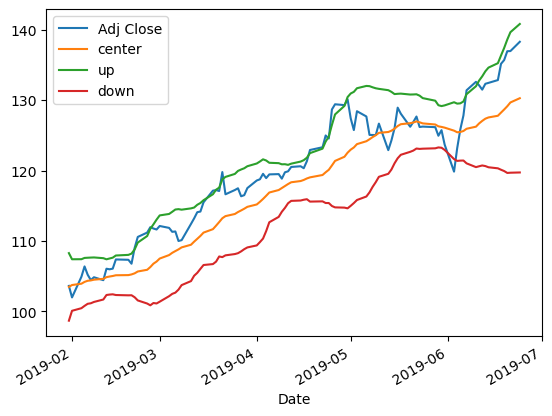

In [186]:
df_test[['Adj Close', 'center', 'up', 'down']].plot()

### 보유 내역 추가
- 조건식
    - 상단 밴드보다 수정 종가가 높거나 같은 경우
        - 현재 보유 상태라면
            - 매도 (trade = '')
        - 현재 보유 상태가 아니라면
            - 유지 (trade = '')
    - 상단 밴드보다 낮고 하단 밴드보다 높은 경우
        - 현재 보유 상태라면
            - 유지 (trade = 'buy')
        - 현재 보유 상태가 아니라면
            - 유지 (trade = '')
    - 하단 밴드보다 수정 종가가 낮거나 같은 경우
        - 현재 보유 상태라면
            - 유지 (trade = 'buy')
        - 현재 보유 상태가 아니라면
            - 매수 (trade = 'buy')

In [187]:
start = datetime(2010,1,1);
end = datetime.now()

In [189]:
price_df = df.loc[start:]

In [ ]:
price_df['trade'] = ''
for idx in price_df.index:
    